In [96]:
# import packages
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# First lets fix the logfiles!
- we fix Mads' logfile (i have made a notebook for it fix_logile.pynb)
- and then we epoch it? lets ask lina

In [105]:
import pandas as pd

# Load the behavioral data
behav_data = pd.read_csv("/work/raw/own_experiments/logfiles/group12/logfile_g_2024-02-29_14h27.56.923.csv")

# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data_new['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data_new['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/work/NadiaHajighassem#9723/CogNeuro24/EEG/friday/preprocessing/new_logfile_g_2024-02-29_14h27.56.923.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/work/NadiaHajighassem#9723/CogNeuro24/EEG/friday/preprocessing/new_logfile_g_2024-02-29_14h27.56.923.csv")

counter = 0
for event in events:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events: 
    print(event[-1])

event_id = {
    'neutral/asian': 41,
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}


99999
43
172
140
156
33
220
33
220
252
43
172
140
158
23
158
130
150
32
220
252
41
172
140
156
33
220
32
220
222
21
158
130
158
21
158
130
23
158
130
170
43
172
140
172
41
172
140
158
21
158
130
23
158
130
150
31
220
21
158
130
158
21
158
130
150
31
220
32
220
252
41
172
140
158
23
158
130
158
21
158
130
158
22
158
130
33
220
33
220
252
43
172
140
156
32
220
32
220
222
22
158
130
150
32
220
222
22
158
130
158
23
62
50
54
33
220
31
220
32
220
32
220
222
22
158
130
170
41
172
140
158
23
158
130
150
32
220
252
41
172
140
172
43
172
140
156
33
220
32
220
252
43
172
140
43
172
140
22
158
130
23
158
130
32
220
252
41
172
140
43
172
140
158
21
158
130
23
158
130
150
33
220
222
21
158
130
43
172
140
156
31
220
252
41
172
140
156
33
220
252
43
140
158
23
158
130
150
33
220
31
54
50
54
33
220
252
41
172
140
41
172
140
158
21
130
31
220
222
23
62
50
22
158
130
158
23
130
158
22
130
150
32
220
33
220
252
43
140
33
220
222
21
130
150
32
220
22
158
130
41
172
140
156
31
220
31
220
33
220
32
220
32
2

Logfiles are fixed yay!!!

# 1. Load data
Alright here is a small explanation for what we are doing: we are defining the EOG channels, which are 'HEOG' and 'VEOG". These are the channels accounting for eye blinks. Then there is the miscellaneous channel, which is the diode thing. 

In [107]:
# Load the data from first participant
path = "/work/raw/own_experiments/Group12_own.vhdr"
raw1 = mne.io.read_raw_brainvision(path, preload=True, eog = ('HEOG','VEOG'), misc = ['41']) # Diode 

raw1.load_data()

Extracting parameters from /work/raw/own_experiments/Group12_own.vhdr...
Setting channel info structure...
Reading 0 ... 523239  =      0.000 ...   523.239 secs...


/tmp/ipykernel_4666/4283008491.py:3: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw1 = mne.io.read_raw_brainvision(path, preload=True, eog = ('HEOG','VEOG'), misc = ['41']) # Diode


Measurement date,"February 29, 2024 14:26:11 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


Now we have loaded in the data from participant 1. Now lets do it for participants 2. 

In [76]:
# Load the data from second participant
path = "/work/raw/own_experiments/group12b_own.vhdr"
raw2 = mne.io.read_raw_brainvision(path, preload=True, eog = ('HEOG','VEOG'), misc = ['41'])

raw2.load_data()

Extracting parameters from /work/raw/own_experiments/group12b_own.vhdr...
Setting channel info structure...
Reading 0 ... 547379  =      0.000 ...   547.379 secs...


/tmp/ipykernel_4666/3628165182.py:3: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw2 = mne.io.read_raw_brainvision(path, preload=True, eog = ('HEOG','VEOG'), misc = ['41'])


Measurement date,"February 29, 2024 14:25:14 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


We need to specify the channel locations now:

In [77]:
# Specify the channel locations
montage = mne.channels.make_standard_montage('standard_1020') 
raw1.set_montage(montage, verbose=False)

Measurement date,"February 29, 2024 14:26:11 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


In [78]:
# Redefine the reference to a common average
raw1.set_eeg_reference('average', projection=False, verbose=False)

Measurement date,"February 29, 2024 14:26:11 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


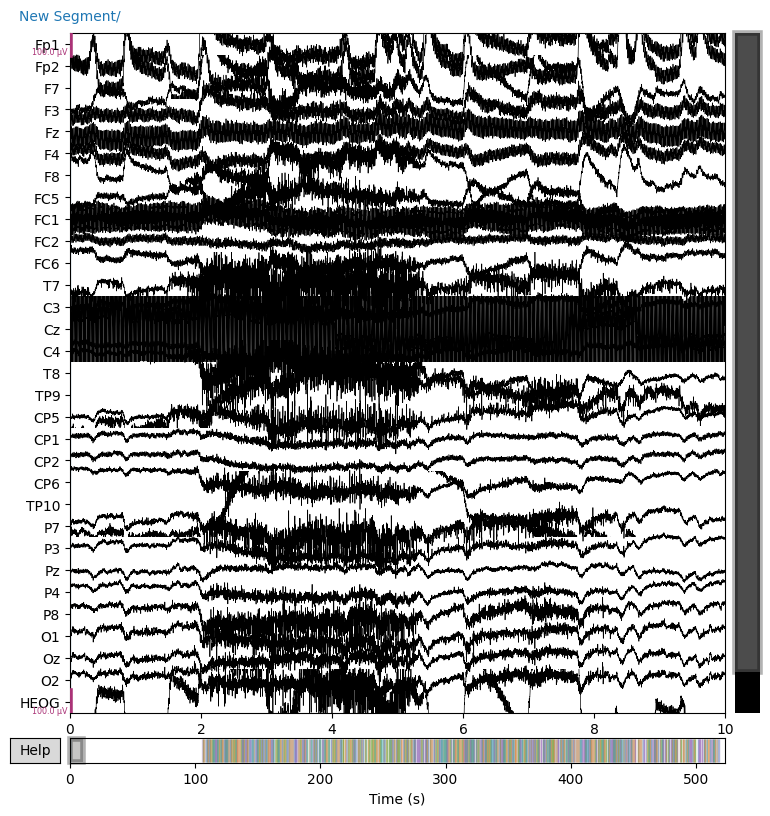

In [80]:
# Plot the data
raw1.plot(n_channels=31, scalings=50e-6);

# c3, c4 and cz looks fucked. lets plot them, so we can see where they are:

In [ ]:
mne.viz.plot_sensors(raw1.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');

Alright now lets remove the bad channels!

In [81]:
raw1.info["bads"] = ["Cz", "FC1", "41", "Fz"]

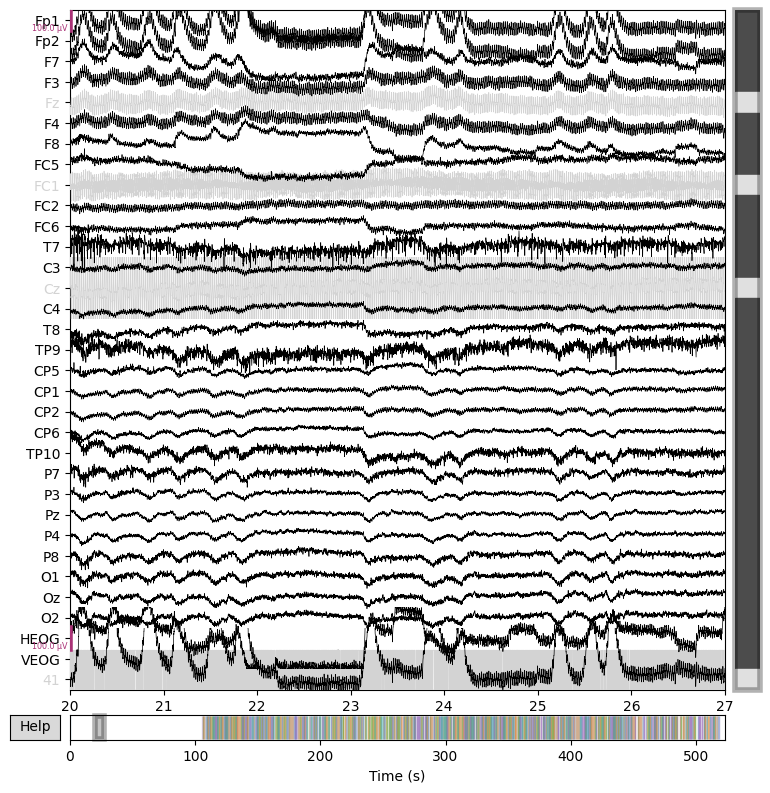

TypeError: Figure.pick() got an unexpected keyword argument 'exclude'

In [83]:
# Plot again after removing bad channels
raw1.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20).pick(exclude="bads");

In [84]:
# Filter the data
raw1.filter(l_freq = 0.1, h_freq = 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Measurement date,"February 29, 2024 14:26:11 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"27 EEG, 2 EOG"
Bad channels,"Cz, FC1, 41, Fz"
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


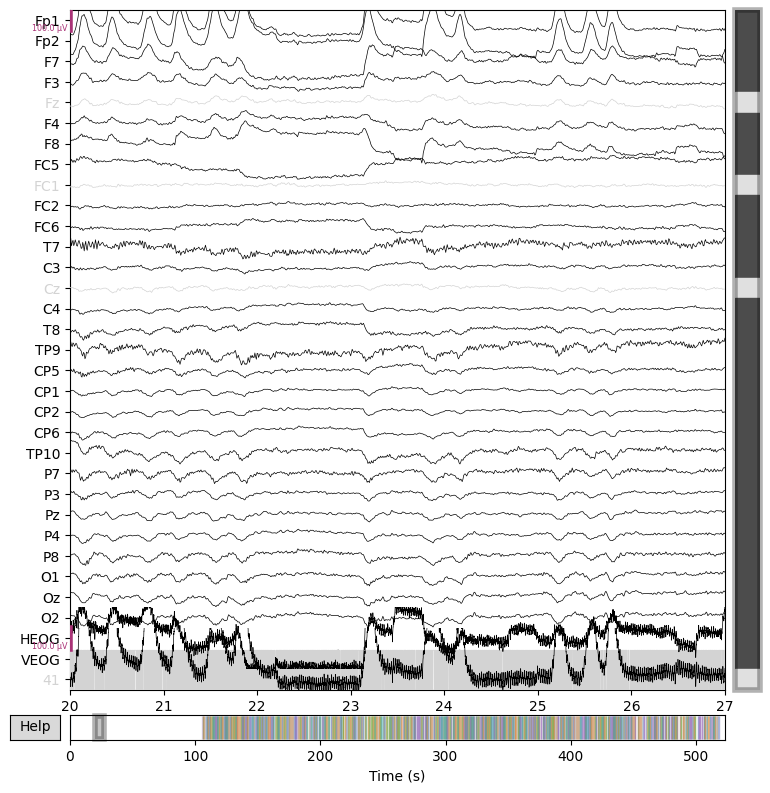

In [85]:
# Plot again to check
raw1.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20);

In [89]:
# ICA in order to figure out which channels to keep
import sklearn # scikit-learn is needed to run ICA (Independent Component Analysis)

In [90]:
# fitting the model
ica = mne.preprocessing.ICA(n_components=0.95, max_iter=800, random_state=7)

ica.fit(raw1)

Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by explained variance: 7 components
Fitting ICA took 5.6s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,18 iterations on raw data (523240 samples)
ICA components,7
Available PCA components,27
Channel types,eeg
ICA components marked for exclusion,—


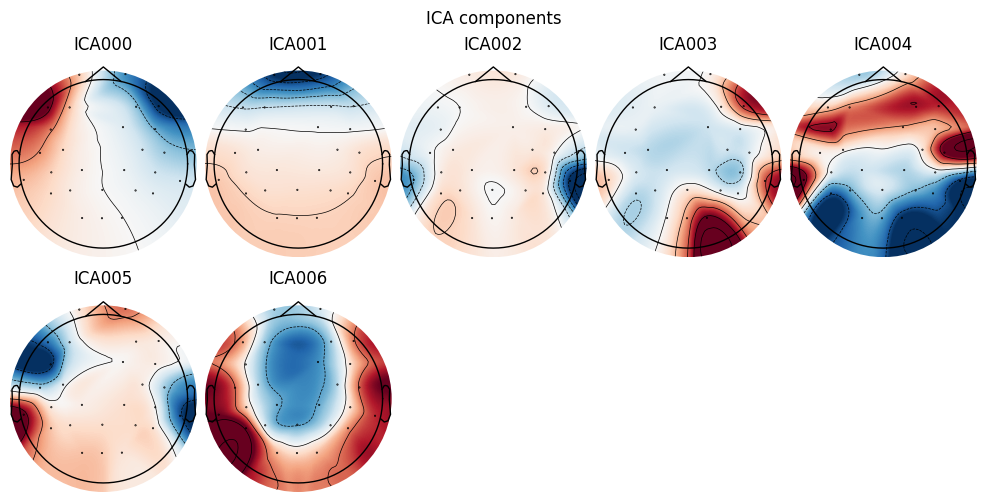

In [88]:
# plotting the model
ica.plot_components();

Creating RawArray with float64 data, n_channels=9, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


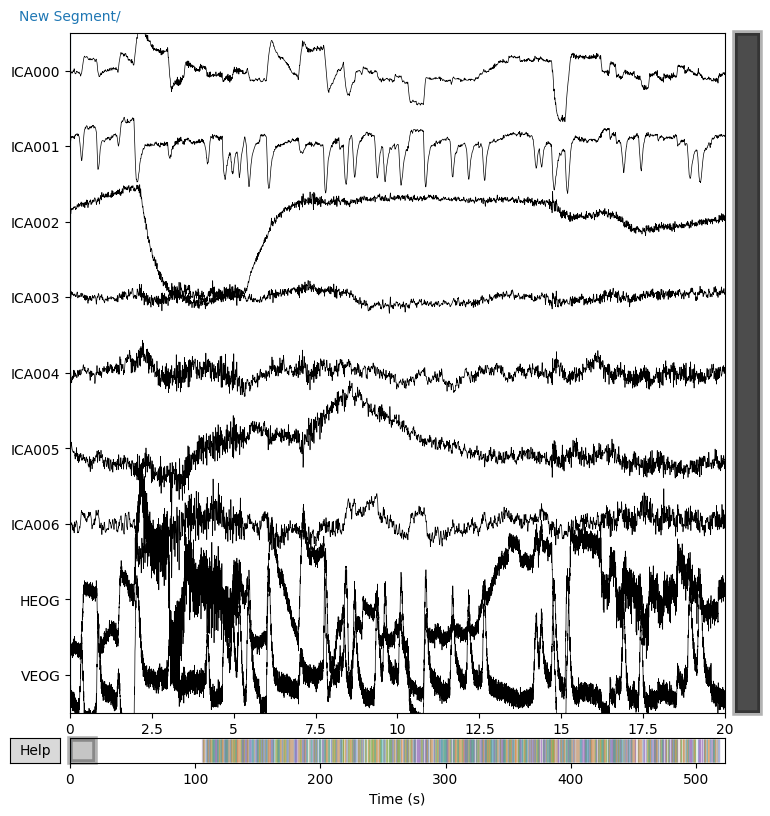

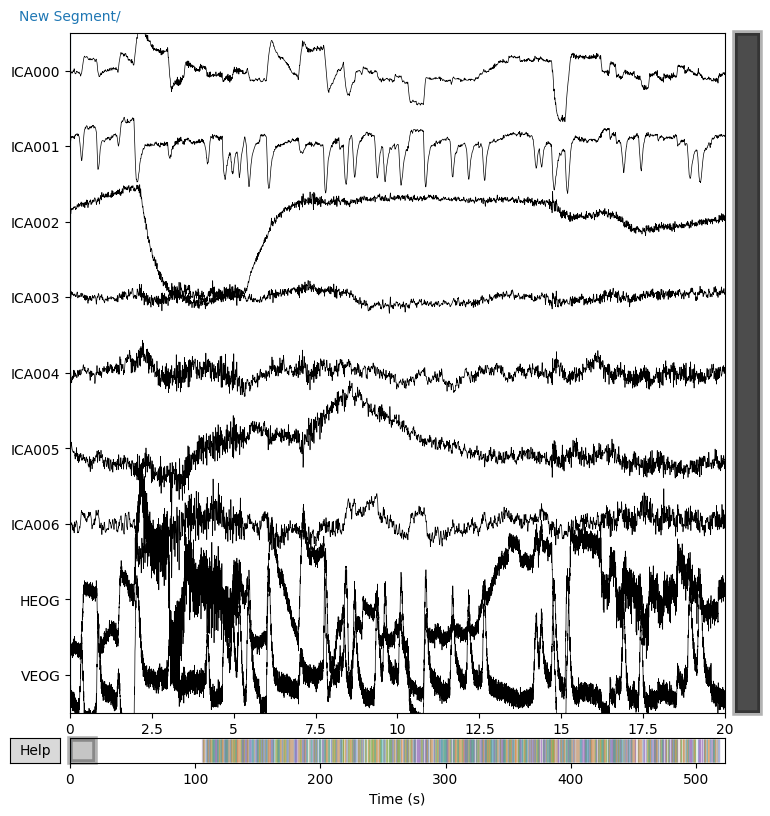

In [ ]:
ica.plot_sources(raw1)

In [91]:
# excluding the eyes
ica.exclude = [0, 1]
ica.apply(raw1)

Applying ICA to Raw instance


    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


Measurement date,"February 29, 2024 14:26:11 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"27 EEG, 2 EOG"
Bad channels,"Cz, FC1, 41, Fz"
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


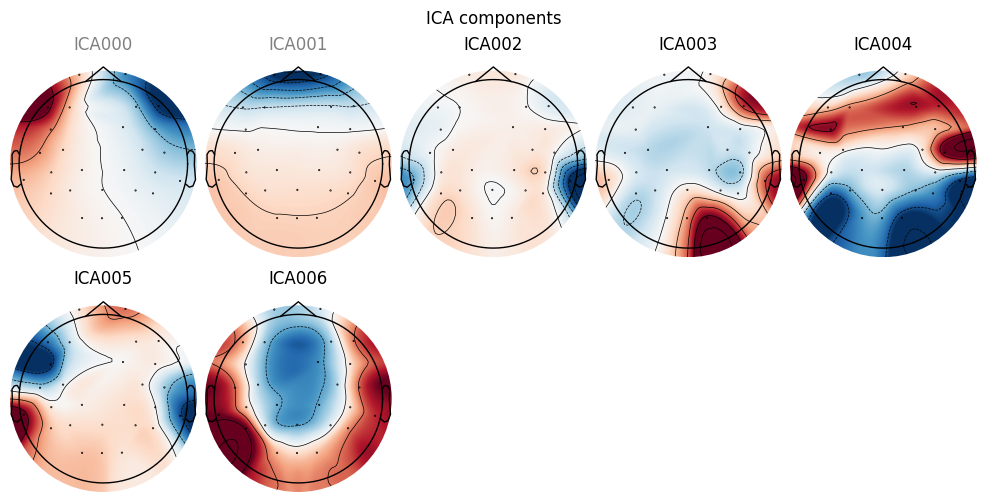

Creating RawArray with float64 data, n_channels=9, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


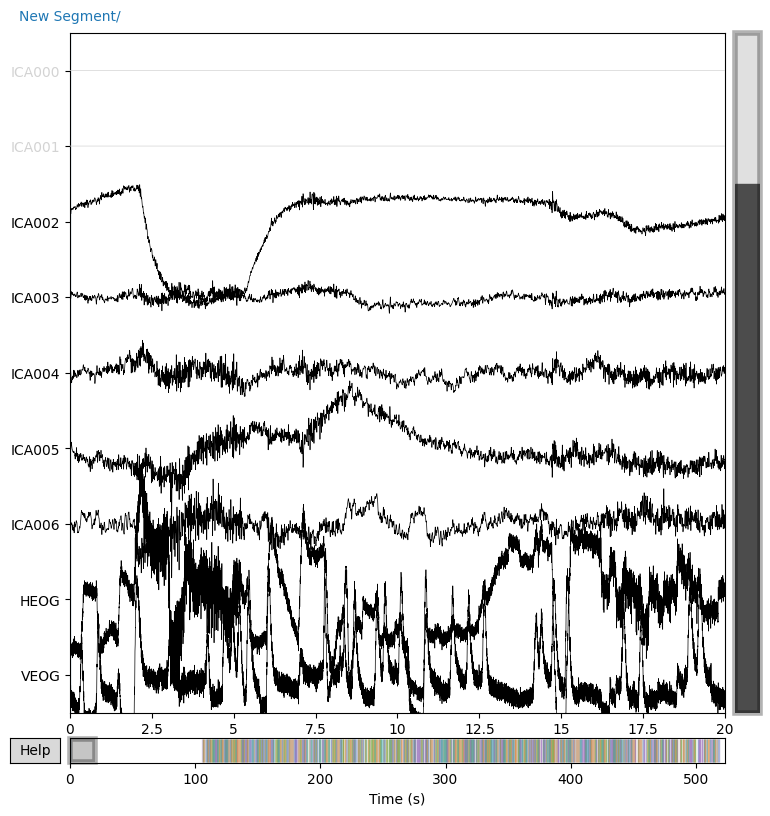

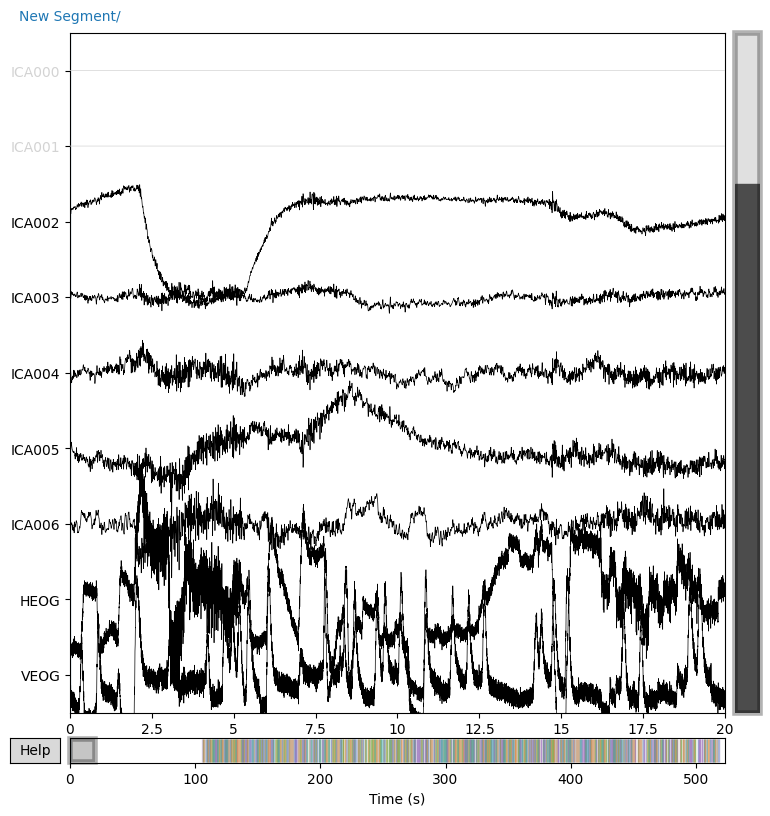

In [ ]:
# Plot again after applying ICA
ica.plot_components()
ica.plot_sources(raw1)

EVENTS HELL YEAHHHHH

In [92]:
# Check for event structure
events, id = mne.events_from_annotations(raw1) 

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 40', 'Stimulus/S 50', 'Stimulus/S 54', 'Stimulus/S 58', 'Stimulus/S 62', 'Stimulus/S130', 'Stimulus/S140', 'Stimulus/S150', 'Stimulus/S156', 'Stimulus/S158', 'Stimulus/S170', 'Stimulus/S172', 'Stimulus/S220', 'Stimulus/S222', 'Stimulus/S252']


# Lets try to fix the triggers

In [93]:
# Naming the events
event_id = {'happy': 20, #happy
'sad': 30, #sad
'neutral': 40, #neutral,
'incorrect': 50, #incorrect,
'correct_sad': 130, #correct sad,
'correct_neutral': 140, #correct neutral,
'correct_happy': 220, #correct happy,
}

/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 54 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 58 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 62 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 150 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 156 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 158 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id);
/tmp/ipykernel_4666/1551136397.py:2: RuntimeWarning: event 170 missing from event_id will be igno

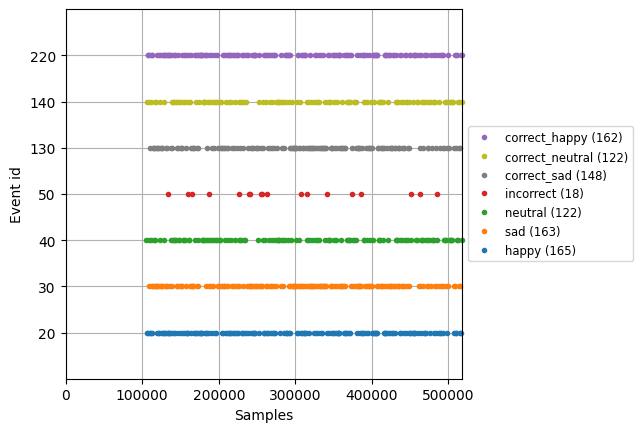

In [94]:
# Plot
mne.viz.plot_events(events, event_id=event_id);

In [ ]:
# Set time-window
tmin, tmax = -0.1, 0.7

# Reject threshold
reject = {'eeg': 150e-6}

In [ ]:
# pick only EEG channels
picks = ['eeg']
# Start epoching data
epochs = mne.Epochs(
    raw1, 
    events = events, 
    event_id = event_id, 
    tmin = tmin, 
    tmax = tmax, 
    picks = picks,
    reject = reject, 
    baseline = (tmin,0),
    preload = True
    )

Not setting metadata
900 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 900 events and 801 original time points ...


0 bad epochs dropped


In [ ]:
# Downsample
epochs.resample(250)

Number of events,900
Events,correct_happy: 162correct_neutral: 122correct_sad: 148happy: 165incorrect: 18neutral: 122sad: 163
Time range,-0.100 – 0.696 s
Baseline,-0.100 – 0.000 s


In [ ]:
correct_happy_epochs = epochs['correct_happy']
correct_sad_epochs = epochs['correct_sad']

In [ ]:
# Get all the epochs info name
epochs.info["ch_names"]

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'TP9',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'TP10',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'Oz',
 'O2']

Not setting metadata
162 matching events found
No baseline correction applied
0 projection items activated


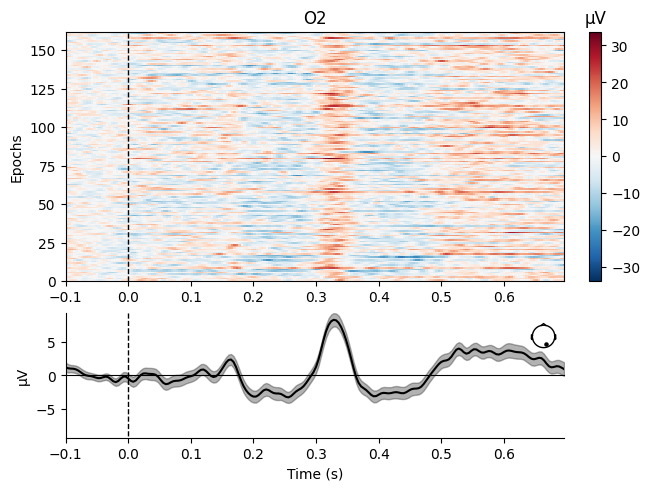

Not setting metadata
162 matching events found
No baseline correction applied
0 projection items activated


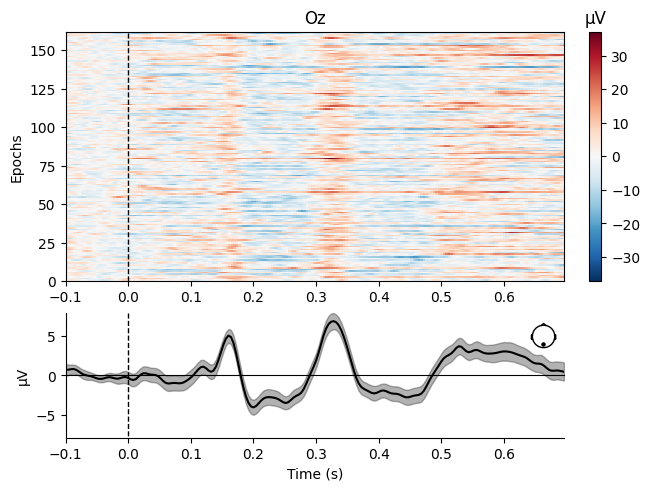

In [ ]:
correct_happy_epochs.plot_image(picks=['O2']);
correct_happy_epochs.plot_image(picks=['Oz']);